In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
small = cv2.imread('/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/cta.jpg')
small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
large = cv2.imread('/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/endframe_1.jpg')
large = cv2.cvtColor(large, cv2.COLOR_BGR2RGB)
larger_image_path = '/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/endframe_1.jpg'
smaller_image_path = '/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/cta.jpg'

In [6]:
import cv2
import numpy as np

def blend_images(larger_image_path, smaller_image_path, alpha=0.5):
    # Read the larger image
    larger_image = cv2.imread(larger_image_path, cv2.IMREAD_UNCHANGED)
    if larger_image is None:
        raise FileNotFoundError(f"Could not open or find the image '{larger_image_path}'")
    
    # Read the smaller image
    smaller_image = cv2.imread(smaller_image_path, cv2.IMREAD_UNCHANGED)
    if smaller_image is None:
        raise FileNotFoundError(f"Could not open or find the image '{smaller_image_path}'")
    
    # Get dimensions of the larger image
    larger_h, larger_w = larger_image.shape[:2]
    
    # Get dimensions of the smaller image
    smaller_h, smaller_w = smaller_image.shape[:2]
    
    # Resize smaller image if it is larger than the larger image
    if smaller_h > larger_h or smaller_w > larger_w:
        aspect_ratio = smaller_w / smaller_h
        if smaller_h > larger_h:
            smaller_h = larger_h
            smaller_w = int(smaller_h * aspect_ratio)
        if smaller_w > larger_w:
            smaller_w = larger_w
            smaller_h = int(smaller_w / aspect_ratio)
        smaller_image = cv2.resize(smaller_image, (smaller_w, smaller_h))
    
    # Calculate the position to place the smaller image
    x_offset = (larger_w - smaller_w) // 2
    y_offset = (larger_h - smaller_h) // 2
    
    # Blend the smaller image on top of the larger image
    blended_image = larger_image.copy()
    for c in range(0, 3):
        blended_image[y_offset:y_offset+smaller_h, x_offset:x_offset+smaller_w, c] = (
            alpha * smaller_image[:, :, c] + 
            (1 - alpha) * larger_image[y_offset:y_offset+smaller_h, x_offset:x_offset+smaller_w, c]
        )
    
    return blended_image


In [8]:
img_blended = blend_images(larger_image_path, smaller_image_path, alpha=0.5)

In [10]:
import cv2
import numpy as np

def blend_images(larger_image_path, smaller_image_path, alpha=0.5, position='center'):
    # Read the larger image
    larger_image = cv2.imread(larger_image_path, cv2.IMREAD_UNCHANGED)
    if larger_image is None:
        raise FileNotFoundError(f"Could not open or find the image '{larger_image_path}'")
    
    # Read the smaller image
    smaller_image = cv2.imread(smaller_image_path, cv2.IMREAD_UNCHANGED)
    if smaller_image is None:
        raise FileNotFoundError(f"Could not open or find the image '{smaller_image_path}'")
    
    # Get dimensions of the larger image
    larger_h, larger_w = larger_image.shape[:2]
    
    # Get dimensions of the smaller image
    smaller_h, smaller_w = smaller_image.shape[:2]
    
    # Resize smaller image if it is larger than the larger image
    if smaller_h > larger_h or smaller_w > larger_w:
        aspect_ratio = smaller_w / smaller_h
        if smaller_h > larger_h:
            smaller_h = larger_h
            smaller_w = int(smaller_h * aspect_ratio)
        if smaller_w > larger_w:
            smaller_w = larger_w
            smaller_h = int(smaller_w / aspect_ratio)
        smaller_image = cv2.resize(smaller_image, (smaller_w, smaller_h))
    
    # Calculate the position to place the smaller image
    if position == 'center':
        x_offset = (larger_w - smaller_w) // 2
        y_offset = (larger_h - smaller_h) // 2
    elif position == 'top-left':
        x_offset = 0
        y_offset = 0
    elif position == 'top-right':
        x_offset = larger_w - smaller_w
        y_offset = 0
    elif position == 'bottom-left':
        x_offset = 0
        y_offset = larger_h - smaller_h
    elif position == 'bottom-right':
        x_offset = larger_w - smaller_w
        y_offset = larger_h - smaller_h
    else:
        raise ValueError("Invalid position argument. Choose from 'center', 'top-left', 'top-right', 'bottom-left', 'bottom-right'")
    
    # Blend the smaller image on top of the larger image
    blended_image = larger_image.copy()
    for c in range(0, 3):
        blended_image[y_offset:y_offset+smaller_h, x_offset:x_offset+smaller_w, c] = (
            alpha * smaller_image[:, :, c] + 
            (1 - alpha) * larger_image[y_offset:y_offset+smaller_h, x_offset:x_offset+smaller_w, c]
        )
    
    return blended_image



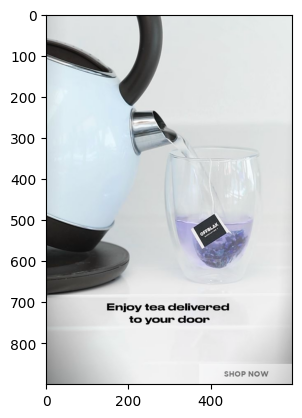

In [12]:
img_blended = blend_images(larger_image_path, smaller_image_path, alpha=0.5, position='bottom-right')
plt.imshow(img_blended)

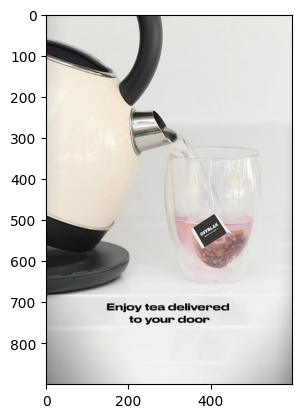

In [31]:
large.shape
plt.imshow(large)

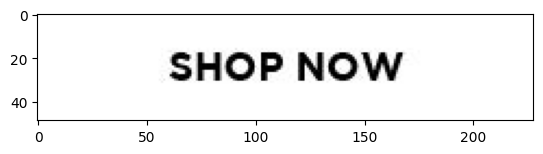

In [55]:
plt.imshow(small)

In [ ]:
final_roi = cv2.bitwise_or(small,large)
plt.show()

In [41]:
small.shape

(49, 228, 3)

In [33]:
large_shape = large.shape

In [38]:
large_shape

(900, 600, 3)

In [35]:
type(large_shape)

tuple

In [34]:
small_shape = small.shape 

In [36]:
result = tuple(x - y for x, y in zip(large_shape, small_shape))

In [39]:
x_offset = result[1]
y_offset = result[0]
print(x_offset,y_offset)

372 851


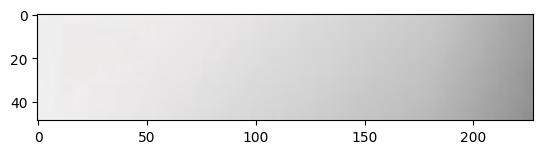

In [43]:
roi = large[y_offset:900, x_offset:600]
plt.imshow(roi)

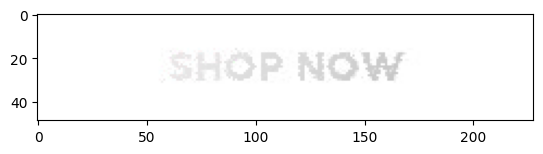

In [49]:
small = cv2.bitwise_or(roi,small)
plt.imshow(small)

In [56]:
large[y_offset:y_offset+small.shape[0], x_offset:x_offset+small.shape[1]]=small

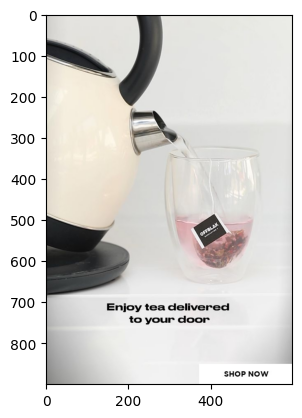

In [57]:
plt.imshow(large)

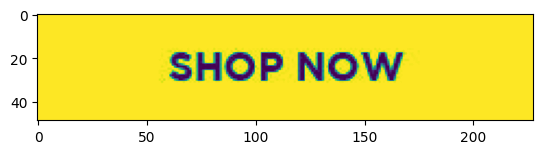

In [46]:
img2grey  = cv2.cvtColor(small, cv2.COLOR_RGB2GRAY)
plt.imshow(img2grey)

In [4]:
image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
combined_img = cv2.hconcat([image1, image2])
combined_img_rgb = cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB)

In [12]:
img3= cv2.imread('/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/cta.jpg')
img4 = cv2.imread('/home/jabez_kassa/week_12/Semantic-Image-and-Text-Alignment/data/Assets/015efcdd8de3698ffc4dad6dabd6664a/endframe_1.jpg')

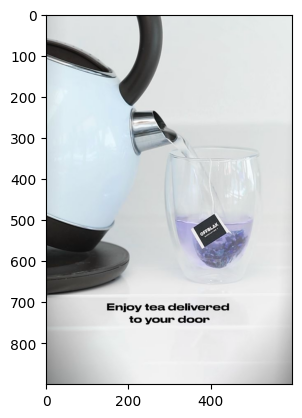

In [24]:
plt.imshow(image2)

In [19]:
crp1 = img3[100:300, 200:400] 
crp2 = img4[50:250, 250:450]

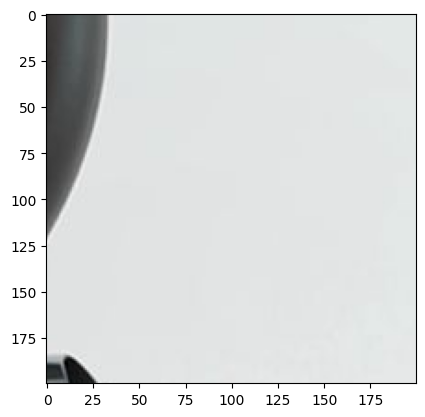

In [20]:
plt.imshow(crp2)

In [16]:
print("img3 shape:", img3.shape)
print("crp2 shape:", crp2.shape)

img3 shape: (49, 228, 3)
crp2 shape: (200, 200, 3)


In [15]:
img3[100:300, 200:400] = crp2 
img4[50:250, 250:450] = crp1

ValueError: could not broadcast input array from shape (200,200,3) into shape (0,28,3)

In [5]:
# Define the regions to be cropped from each image
crp1 = image3[100:300, 200:400]
crp2 = image4[50:250, 250:450]

# Swap the cropped parts
img3[100:300, 200:400] = crop2
img4[50:250, 250:450] = crop1

# Saving the final images
cv2.imwrite('image3_swapped.jpg', image3)
cv2.imwrite('image4_swapped.jpg', image4)

# Display the modified images (optional)
cv2.imshow('Image 1 Swapped', image3)
cv2.imshow('Image 2 Swapped', image4)
cv2.waitKey(0)
cv2.destroyAllWindows()

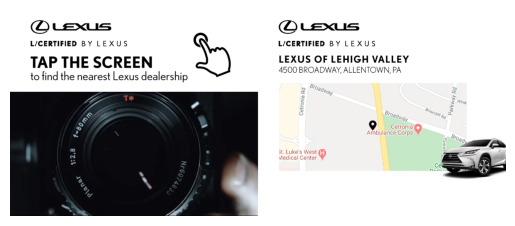

In [10]:
plt.imshow(combined_img_rgb)
plt.axis('off')  # Optional: to turn off axis
plt.show()

In [ ]:
from openai import OpenAI
client = OpenAI()

response = client.images.edit((
  model="dall-e-2",
  image=open("sunlit_lounge.png", "rb"),
  mask=open("mask.png", "rb"),
  prompt="A sunlit indoor lounge area with a pool containing a flamingo",
  n=1,
  size="1024x1024"
)
image_url = response.data[0].url